In [1]:
import util as u
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras


FileNotFoundError: [Errno 2] No such file or directory: 'images/Images_png/'

In [63]:
convert_to_iou_format(np.array([[10,20,40,50]]))

array([[10, 20, 30, 30]])

In [64]:
xs,ys = u.get_dataset()
X_train  = xs[:30]
Y_train = ys[:30]; Y_train = Y_train.reshape(30,4)/512
X_test = xs[30:39]
Y_test = ys[30:39]; Y_test = Y_test.reshape(9,4)/512

#set params
batch_size=1
num_epochs=300
model_name="v0_" + str(num_epochs) + "e_b" + str(batch_size)

In [65]:
Y_train[0,:]

array([0.38085938, 0.20703125, 0.45117188, 0.25585938])

In [66]:
X_train.shape

(30, 512, 512, 3)

In [67]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=11, input_shape=(512, 512, 3)))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))

#pool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size=11))
model.add(Activation('relu'))

#pool 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4, activation = None))


#model.add(Dense(4, activation = "sigmoid", kernel_initializer=keras.initializers.RandomNormal(mean=0,stddev=0.05)))

# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [68]:
#compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999), loss='mean_squared_error',metrics=[IoU])

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 502, 502, 10)      3640      
_________________________________________________________________
activation_16 (Activation)   (None, 502, 502, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 492, 492, 10)      12110     
_________________________________________________________________
activation_17 (Activation)   (None, 492, 492, 10)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 246, 246, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 236, 236, 10)      12110     
_________________________________________________________________
activation_18 (Activation)   (None, 236, 236, 10)     

In [72]:
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=num_epochs)

Train on 30 samples, validate on 9 samples
Epoch 1/300
30/30 [==============================] - 1s 48ms/sample - loss: 1.5889e-04 - IoU: 0.4898 - val_loss: 0.0356 - val_IoU: 0.0089
Epoch 2/300
30/30 [==============================] - 1s 47ms/sample - loss: 1.8744e-04 - IoU: 0.4979 - val_loss: 0.0339 - val_IoU: 0.0073
Epoch 3/300
30/30 [==============================] - 1s 46ms/sample - loss: 2.2983e-04 - IoU: 0.4560 - val_loss: 0.0367 - val_IoU: 0.0000e+00
Epoch 4/300
30/30 [==============================] - 1s 46ms/sample - loss: 1.5504e-04 - IoU: 0.5150 - val_loss: 0.0335 - val_IoU: 0.0043
Epoch 5/300
30/30 [==============================] - 1s 47ms/sample - loss: 1.4791e-04 - IoU: 0.5545 - val_loss: 0.0360 - val_IoU: 0.0011
Epoch 6/300
17/30 [================>.............] - ETA: 0s - loss: 3.6831e-04 - IoU: 0.4829

KeyboardInterrupt: 

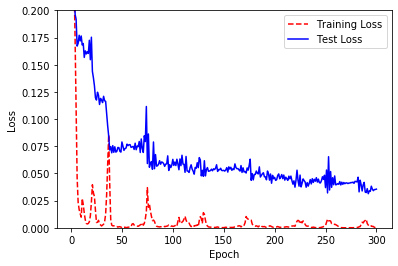

In [73]:
train_loss = h.history['loss']
test_loss  = h.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)

plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.2])
plt.show();


In [ ]:
plt.savefig("models/" + model_name + ".png")

In [9]:
def get_results(x,y) : 
    pred = model.predict(x)
    return (pred, y, y-pred , np.mean( (y-pred)**2) ) 
    

In [10]:
y_train_p, y_train, train_diff , train_loss = get_results(X_train,Y_train)

In [11]:
y_test_p, y_test, test_diff , test_loss = get_results(X_test,Y_test)

In [12]:
y_train_p

array([[0.37581712, 0.23072742, 0.4439667 , 0.28065902],
       [0.23822387, 0.7179533 , 0.2892238 , 0.75366735],
       [0.3275341 , 0.12389699, 0.39373767, 0.17774814],
       [0.33624613, 0.23275793, 0.3920238 , 0.27808872],
       [0.47947374, 0.32642826, 0.5331826 , 0.3976889 ],
       [0.32290775, 0.5098858 , 0.37946734, 0.54842657],
       [0.0830577 , 0.55946827, 0.11033231, 0.5942321 ],
       [0.5576454 , 0.36674178, 0.5874224 , 0.3997019 ],
       [0.5437794 , 0.48281598, 0.5788866 , 0.511623  ],
       [0.24565127, 0.667676  , 0.2857859 , 0.69896543],
       [0.0910531 , 0.5630158 , 0.12262052, 0.59741354],
       [0.48750293, 0.32934928, 0.5318779 , 0.37097266],
       [0.49083096, 0.3692063 , 0.5330481 , 0.4128721 ],
       [0.22715971, 0.31440347, 0.40346828, 0.49415186],
       [0.4721615 , 0.42439914, 0.52263147, 0.47171023],
       [0.47741413, 0.3899507 , 0.523986  , 0.43089965],
       [0.4710845 , 0.40417808, 0.51829773, 0.45431444],
       [0.4874492 , 0.41978204,

In [13]:
y_train

array([[0.38085938, 0.20703125, 0.45117188, 0.25585938],
       [0.25976562, 0.68164062, 0.31054688, 0.71875   ],
       [0.328125  , 0.12304688, 0.38867188, 0.17773438],
       [0.33789062, 0.2265625 , 0.39257812, 0.27148438],
       [0.4765625 , 0.31445312, 0.53710938, 0.38867188],
       [0.3125    , 0.5234375 , 0.36328125, 0.56640625],
       [0.11328125, 0.54296875, 0.14453125, 0.57617188],
       [0.54296875, 0.36132812, 0.57617188, 0.39648438],
       [0.54882812, 0.47460938, 0.58398438, 0.50390625],
       [0.24804688, 0.65234375, 0.2890625 , 0.68554688],
       [0.13476562, 0.5234375 , 0.16601562, 0.55664062],
       [0.4921875 , 0.328125  , 0.5390625 , 0.37109375],
       [0.49023438, 0.37109375, 0.53320312, 0.41796875],
       [0.25195312, 0.31640625, 0.4140625 , 0.484375  ],
       [0.48828125, 0.4453125 , 0.53515625, 0.49414062],
       [0.48632812, 0.3984375 , 0.53320312, 0.43945312],
       [0.49023438, 0.41015625, 0.5390625 , 0.45898438],
       [0.49609375, 0.421875  ,

In [14]:
(y_train_p - y_train)#train_diff

array([[-5.04225492e-03,  2.36961693e-02, -7.20518827e-03,
         2.47996449e-02],
       [-2.15417594e-02,  3.63126993e-02, -2.13230848e-02,
         3.49173546e-02],
       [-5.90890646e-04,  8.50111246e-04,  5.06579876e-03,
         1.37686729e-05],
       [-1.64449215e-03,  6.19542599e-03, -5.54323196e-04,
         6.60434365e-03],
       [ 2.91123986e-03,  1.19751394e-02, -3.92675400e-03,
         9.01702046e-03],
       [ 1.04077458e-02, -1.35517120e-02,  1.61860883e-02,
        -1.79796815e-02],
       [-3.02235484e-02,  1.64995193e-02, -3.41989398e-02,
         1.80602074e-02],
       [ 1.46766305e-02,  5.41365147e-03,  1.12504959e-02,
         3.21751833e-03],
       [-5.04875183e-03,  8.20660591e-03, -5.09774685e-03,
         7.71677494e-03],
       [-2.39560008e-03,  1.53322220e-02, -3.27658653e-03,
         1.34185553e-02],
       [-4.37125266e-02,  3.95783186e-02, -4.33951020e-02,
         4.07729149e-02],
       [-4.68456745e-03,  1.22427940e-03, -7.18462467e-03,
      

In [15]:
train_loss

0.00020498701606660452

In [16]:
# serialize model to JSON
def save_model(model,name) : 
    model_json = model.to_json()
    model_name = "models/" + name
    with open(model_name + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_name + ".h5")
    print("Saved model to disk")

In [17]:
save_model(model,model_name)

Saved model to disk
